# Исследование данных:

In [56]:
# Импортирую Нужные библиотеки:
import pandas as pd
import numpy as np
import matplotlib
import scipy
from matplotlib import pyplot as plt
import seaborn as sns

In [57]:
# Гружу дата-сеты
employees = pd.read_excel('перс инфо (возраст, пол и т.п.).xlsx')
learnings = pd.read_excel(
    'Выгрузка клиентский_обучения_апрель_2023.xlsx',
    usecols=['Табельный номер МТС', 'Признак присутствия'])
tnps_bef = pd.read_excel('tnps_ДО.xlsx',
                         sheet_name='Сотрудники',
                         usecols=[
                             'Дивизион', 'Регион', 'Город', 'Директор региона',
                             'Директор сектора', 'Код ТТ', 'Тип ТТ',
                             'ФИО Сотрудника', 'Табельный номер', 'tNPS Март'
                         ])
tnps_after = pd.read_excel('tnps_После.xlsx',
                           sheet_name='Сотрудники',
                           usecols=[
                               'Дивизион', 'Регион', 'Город',
                               'Директор региона', 'Директор сектора',
                               'Код ТТ', 'Тип ТТ', 'ФИО Сотрудника',
                               'Табельный номер', 'tNPS Май'
                           ])

In [58]:
# привязки:
bindings = pd.read_excel(
    r'C:\Users\nvlysen2\Desktop\Лысенко Н. В\отчеты\Статистика магазинов\Статистика, режим работы и временно неработающие магазины_25.09.2022.xlsx',
    sheet_name='Статусы магазинов',
    usecols=[
        'Код магазина', 'Дивизион', 'Область', 'Населенный пункт',
        'Руководитель сектора', 'Руководитель региона'
    ])

## Обработка tnps before and after

   ###    1.Before:

In [62]:
# Преобразую колонку в численный формат:
tnps_bef['tNPS Март'] = pd.to_numeric(tnps_bef['tNPS Март'], errors = 'coerce')

In [63]:
# Смотрю информацию о дата-сете:
tnps_bef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9161 entries, 0 to 9160
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Дивизион          9161 non-null   object 
 1   Регион            9161 non-null   object 
 2   Город             9161 non-null   object 
 3   Директор региона  9161 non-null   object 
 4   Директор сектора  9161 non-null   object 
 5   Код ТТ            9161 non-null   object 
 6   Тип ТТ            9161 non-null   object 
 7   ФИО Сотрудника    9161 non-null   object 
 8   Табельный номер   9161 non-null   object 
 9   tNPS Март         9016 non-null   float64
dtypes: float64(1), object(9)
memory usage: 715.8+ KB


In [64]:
# Переименовываю колонки для удобства:
tnps_bef.rename(columns = {'tNPS Март':'tNps_ДО'}, inplace = True)

In [65]:
# Меняю тип и переименовываю колонку
tnps_bef['Табельный номер'] = tnps_bef['Табельный номер'].astype(str)
tnps_bef.rename(columns = {'Табельный номер':'tub_number'}, inplace = True)

In [66]:
# Отбираю нужные колонки
tnps_bef = tnps_bef[['tub_number', 'tNps_ДО']]

### 2. After:

In [68]:
# Приобразовываем значение в столбце "tNps Май" из объекта в нумерик:
tnps_after['tNPS Май'] = pd.to_numeric(tnps_after['tNPS Май'], errors = 'coerce')

In [70]:
# Преобразовываю в нужный тип:
tnps_after['Табельный номер'] = tnps_after['Табельный номер'].astype(str)

In [71]:
# Переименовываю
tnps_after.rename(columns = {'Табельный номер':'tub_number'}, inplace = True)

In [73]:
# Переименовываю
tnps_after.rename(columns = {'tNPS Май': 'tNPS_after'}, inplace = True)

In [74]:
# отбираю нужные столбцы
tnps_after = tnps_after[['tub_number', 'tNPS_after']]

## Соединяем tNps с информацией по сотрудникам.

In [76]:
employees['tub_number'] = employees['tub_number'].astype(str)

In [77]:
empl_nps = employees.merge(tnps_bef, how='left',
                           on='tub_number').merge(tnps_after, how = 'left', on = 'tub_number')

In [79]:
# Убираю строки без данных в определенных столбцах
empl_nps.dropna(subset = ['tNps_ДО', 'tNPS_after'], inplace = True)

In [81]:
# Создаю новый столбец, выбирая определенное кол-во символов из строки для дальнейшего объеденения
# По данному ключу.
empl_nps['barcode_mts'] = empl_nps['barcode_mts'].str[:6]

## Работа с обучениями

In [83]:
# гружу еще один дата-сет с данными по обучению
learnings = pd.read_excel(
    'Выгрузка клиентский_обучения_апрель_2023.xlsx',
    usecols=['Табельный номер МТС', 'Признак присутствия'])

In [85]:
learnings.rename(columns = {'Табельный номер МТС':'barcode_mts'}, inplace = True)
learnings['barcode_mts'] = learnings['barcode_mts'].astype(str).str[:6]
learnings.head()

,barcode_mts,Признак присутствия
0,530476,+
1,392649,+
2,511986,+
3,553058,+
4,554209,+


## Объединение nps, learnings

In [86]:
empl_nps_learn = empl_nps.merge(learnings, how = 'left', on = 'barcode_mts')

In [87]:
empl_nps_learn['Признак присутствия'].fillna('-', inplace = True)

In [89]:
# Выделяю тестовую и контрольную группу
empl_nps_learn['group'] = np.where(empl_nps_learn['Признак присутствия'] == '+', 't', 'c')

# Нужно добавить привязки и выделить только сибирь и дальний восток

In [91]:
empl_nps_learn = empl_nps_learn.merge(bindings, how = 'left', left_on = 'shop',
                                     right_on = 'Код магазина')

In [92]:
# Отбираю только дивизионы Сибирь и Дальний Восток.
filter_list = ['Сибирь', 'Дальний Восток']
empl_nps_learn = empl_nps_learn[empl_nps_learn.Дивизион.isin(filter_list)]

In [94]:
# Делаю группировку для дальнейшей визуализации распределения
empl_gr_nps = empl_nps_learn.groupby(by = ['tNps_ДО']).agg({'tub_number':'count'}).reset_index()
empl_gr_nps.head()

,tNps_ДО,tub_number
0,-1.0000,1
1,-0.6667,2
2,-0.5000,1
3,-0.4286,1
4,-0.2000,2


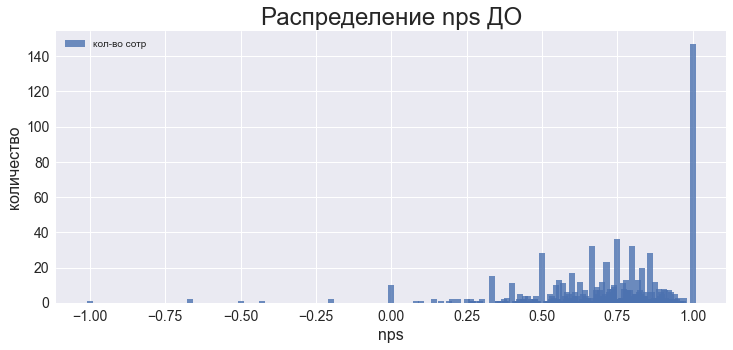

In [328]:
#Рапределение nps
#Визуализация
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(empl_gr_nps['tNps_ДО'],
        empl_gr_nps['tub_number'], alpha = 0.8, label = 'кол-во сотр', width = 0.02)
# Подписи графика:
plt.title('Распределение nps ДО', fontsize = 24)
plt.xlabel('nps', fontsize = 16)
plt.ylabel('количество', fontsize = 16)
plt.tick_params(axis = 'both', labelsize = 14)
plt.legend()
plt.show()

In [96]:
empl_gr_nps_aft = empl_nps_learn.groupby(by = ['tNPS_after']).agg({'tub_number':'count'}).reset_index()
empl_gr_nps_aft.head()

,tNPS_after,tub_number
0,-1.0000,7
1,-0.3333,2
2,0.0000,8
3,0.1111,1
4,0.1250,1


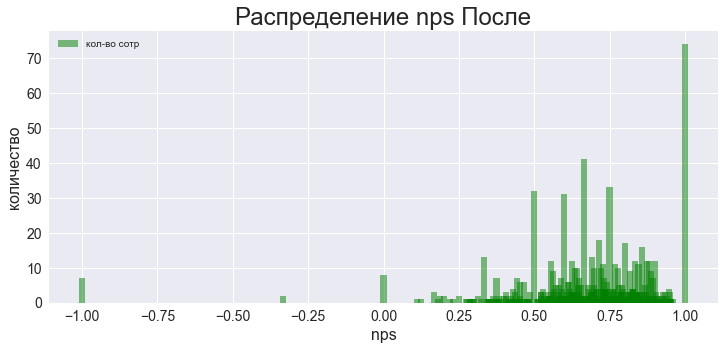

In [329]:
#Рапределение nps
#Визуализация
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(empl_gr_nps_aft['tNPS_after'],
       empl_gr_nps_aft['tub_number'],
       alpha=0.5,
       label='кол-во сотр',
       width=0.02,
       color='green')
# Подписи графика:
plt.title('Распределение nps После', fontsize=24)
plt.xlabel('nps', fontsize=16)
plt.ylabel('количество', fontsize=16)
plt.tick_params(axis='both', labelsize=14)
plt.legend()
#plt.savefig('graphs/Распределение по грейдам (все).png', bbox_inches = 'tight')
plt.show()

## Выводы по распределению nps:
1. Огромная доля сотрудников (около 80%) занимает с показателем 100%. И так как у них динамики в + быть не может, то при учете таких сотрудников средняя динамика будет близится к 0 или отрицательным значениям. По этому мы обрежем данный выброс до 90%.

In [ ]:
# Обрезаем хвосты:
empl_nps_learn_2 = empl_nps_learn[(empl_nps_learn['tNps_ДО']<0.9)&(empl_nps_learn['tNps_ДО']>=0)]

In [ ]:
# смотрю распределение после удаления хвостов:
empl_gr_nps_cl = empl_nps_learn_2.groupby(by = ['tNps_ДО']).agg({'tub_number':'count'}).reset_index()

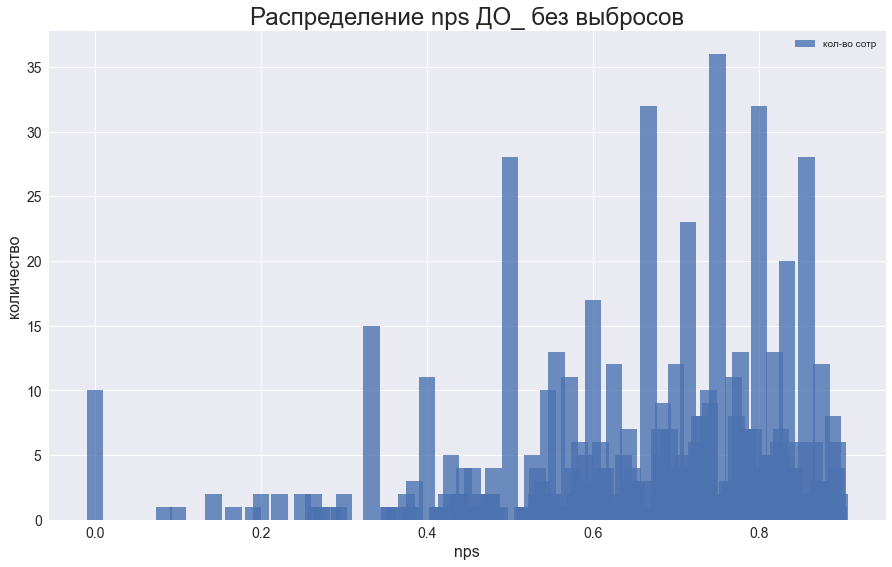

In [101]:
#Рапределение после удаления выбросов nps
#Визуализация
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(15, 9))
ax.bar(empl_gr_nps_cl['tNps_ДО'],
        empl_gr_nps_cl['tub_number'], alpha = 0.8, label = 'кол-во сотр', width = 0.02)
# Подписи графика:
plt.title('Распределение nps ДО_ без выбросов', fontsize = 24)
plt.xlabel('nps', fontsize = 16)
plt.ylabel('количество', fontsize = 16)
plt.tick_params(axis = 'both', labelsize = 14)
plt.legend()
#plt.savefig('graphs/Распределение по грейдам (все).png', bbox_inches = 'tight')
plt.show()

In [102]:
# Вычисляю динамику:
empl_nps_learn_2['dinamics'] = (empl_nps_learn_2['tNPS_after'] - empl_nps_learn_2['tNps_ДО'])*100

C:\Users\nvlysen2\AppData\Local\Temp\ipykernel_7628\2762659192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empl_nps_learn_2['dinamics'] = (empl_nps_learn_2['tNPS_after'] - empl_nps_learn_2['tNps_ДО'])*100


## Описательная статистика по группам теста:

In [104]:
math_func = {'dinamics': ['describe']}

In [105]:
gr_din_gr = empl_nps_learn_2.groupby(by = ['group']).agg(math_func).reset_index(col_level = 2)

In [106]:
gr_din_gr

dinamics                                                             
        describe                                                             
  group    count      mean        std     min      25%   50%      75%     max
0     c    582.0 -1.027474  27.231231 -184.62 -14.0875 -1.41  13.2275  100.00
1     t    297.0  1.805488  24.867554 -155.56 -12.9900  3.12  16.5600   75.71

<AxesSubplot:xlabel='group'>

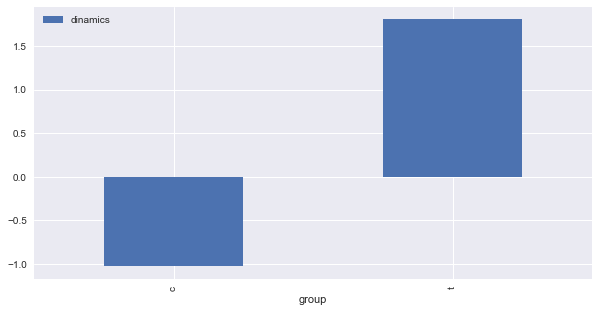

In [107]:

empl_nps_learn_2.groupby(['group']).agg('mean')[['dinamics']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           )

In [108]:
# Функция для быстрой отрисовки распределений
def plot_segments_distribution(df, segment_columns, test_factor):
    for segment in segment_columns:
        aggregated_data = df.groupby(by = [test_factor, segment])['dinamics'].mean().reset_index()
        sns.catplot(x = segment, 
                    y = 'dinamics', 
                    hue = test_factor, # сообщаем, что хотим, чтобы разные группы имели разный цвет
                    data = aggregated_data, 
                    kind = "bar", 
                    height = 6, # задаем размер графика 
                    aspect = 1) # задаем ширину столбца

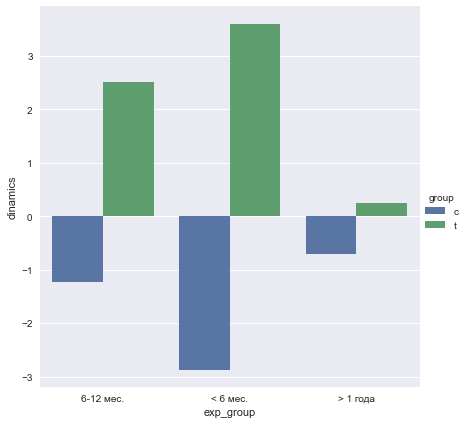

In [109]:
plot_segments_distribution(empl_nps_learn_2, ['exp_group'], 'group')

### Описательная статистика по группе/группе опыта:

In [110]:
gr_din_gr_exp = empl_nps_learn_2.groupby(
    by=['group', 'exp_group']).agg(math_func)

gr_din_gr_exp_2=gr_din_gr_exp.reset_index(col_level = 2)

In [111]:
gr_din_gr_exp_2

dinamics                                               \
                   describe                                                
  group  exp_group    count      mean        std     min      25%    50%   
0     c  6-12 мес.    173.0 -1.232543  29.311497 -180.00 -14.9900 -2.780   
1     c   < 6 мес.     45.0 -2.866444  37.896702 -184.62 -16.4000  1.780   
2     c   > 1 года    364.0 -0.702665  24.599807 -171.05 -12.5375 -0.055   
3     t  6-12 мес.     82.0  2.518537  22.042771  -65.15 -14.3100  4.950   
4     t   < 6 мес.     82.0  3.603171  28.712602 -155.56  -9.9375  4.790   
5     t   > 1 года    133.0  0.257519  24.039982  -66.67 -14.1300  0.850   

                    
                    
       75%     max  
0  13.0800  100.00  
1  18.0000   50.80  
2  12.6425   80.00  
3  17.5625   54.17  
4  20.0900   64.29  
5  14.2900   75.71

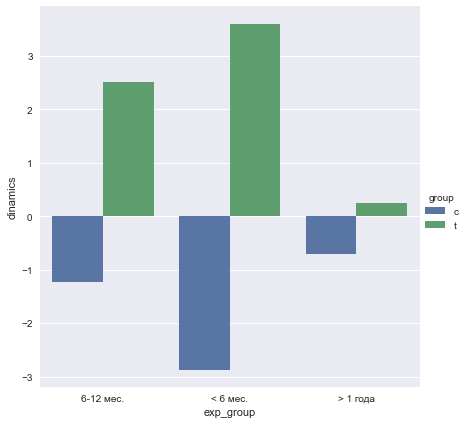

In [112]:
plot_segments_distribution(empl_nps_learn_2, ['exp_group'], 'group')

### Описательная статистика группа/пол:

In [113]:
gr_din_gr_sex = empl_nps_learn_2.groupby(
    by=['group', 'sex']).agg(math_func)

gr_din_gr_sex=gr_din_gr_sex.reset_index(col_level = 2)
gr_din_gr_sex

dinamics                                                      \
            describe                                                       
  group sex    count      mean        std     min     25%    50%     75%   
0     c   m    291.0 -0.783299  27.110291 -184.62 -12.360 -1.630  13.375   
1     c   w    291.0 -1.271649  27.396157 -180.00 -16.240 -0.640  13.130   
2     t   m    134.0  3.402910  21.990548  -54.76  -9.775  4.725  15.870   
3     t   w    163.0  0.492270  27.000830 -155.56 -14.550  0.000  16.855   

           
           
      max  
0  100.00  
1  100.00  
2   68.75  
3   75.71

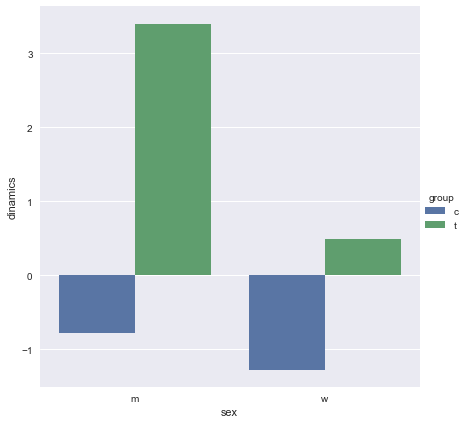

In [114]:
plot_segments_distribution(empl_nps_learn_2, ['sex'], 'group')

### Описательная статистика группа/дивизион:

In [115]:
gr_din_gr_div = empl_nps_learn_2.groupby(
    by=['group', 'Дивизион']).agg(math_func)

gr_din_gr_div=gr_din_gr_div.reset_index(col_level = 2)
gr_din_gr_div

dinamics                                              \
                        describe                                               
  group        Дивизион    count      mean        std     min      25%   50%   
0     c  Дальний Восток    291.0  0.032852  26.652719 -171.05 -12.3650 -0.11   
1     c          Сибирь    291.0 -2.087801  27.803115 -184.62 -14.8800 -2.18   
2     t  Дальний Восток    147.0  1.869184  22.699797  -66.67 -13.1000  3.18   
3     t          Сибирь    150.0  1.743067  26.899367 -155.56 -12.4825  0.00   

                  
                  
     75%     max  
0  13.79  100.00  
1  12.50  100.00  
2  14.48   64.29  
3  17.95   75.71

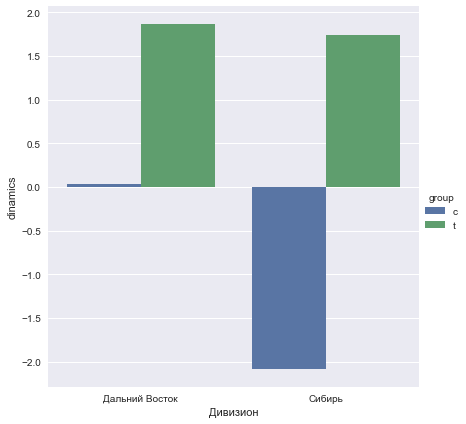

In [116]:
plot_segments_distribution(empl_nps_learn_2, ['Дивизион'], 'group')

### Описательная статистика группа/опыт/пол:

In [117]:
gr_din_gr_exp_sex = empl_nps_learn_2.groupby(
    by=['group', 'exp_group','sex']).agg(math_func)

gr_din_gr_exp_sex=gr_din_gr_exp_sex.reset_index(col_level = 2)
gr_din_gr_exp_sex#.sort_values(by = ['mean'], ascending = False)

dinamics                                         \
                        describe                                          
   group  exp_group sex    count       mean        std     min      25%   
0      c  6-12 мес.   m     91.0  -0.348571  22.985132  -52.78 -13.8800   
1      c  6-12 мес.   w     82.0  -2.213537  35.150066 -180.00 -16.6000   
2      c   < 6 мес.   m     25.0 -10.333600  45.916983 -184.62 -16.4000   
3      c   < 6 мес.   w     20.0   6.467500  22.306203  -28.58 -12.3875   
4      c   > 1 года   m    175.0   0.354971  25.423675 -171.05 -11.4700   
5      c   > 1 года   w    189.0  -1.681958  23.837372 -127.27 -15.4400   
6      t  6-12 мес.   m     33.0   1.372121  15.242094  -25.19  -9.8000   
7      t  6-12 мес.   w     49.0   3.290612  25.759188  -65.15 -16.1300   
8      t   < 6 мес.   m     49.0  10.193061  22.760784  -30.95   2.4200   
9      t   < 6 мес.   w     33.0  -6.181818  33.830188 -155.56 -15.4300   
10     t   > 1 года   m     52.0  -1.706731  23.540921  -54.76 -16.7450   
11     t   > 1 года   w     81.0   1.518519  24.416485  -66.67 -12.9900   

                             
                             
       50%      75%     max  
0   -2.900  13.7800  100.00  
1   -2.225  11.8625  100.00  
2   -4.170  18.0000   47.06  
3   10.865  19.5950   50.80  
4   -0.110  13.2700   75.00  
5    0.000  12.2000   80.00  
6    3.840  13.9400   29.17  
7    9.650  23.3300   54.17  
8    7.700  22.9200   64.29  
9   -3.290   4.7900   44.83  
10   0.900  14.3075   68.75  
11   0.850  12.7000   75.71

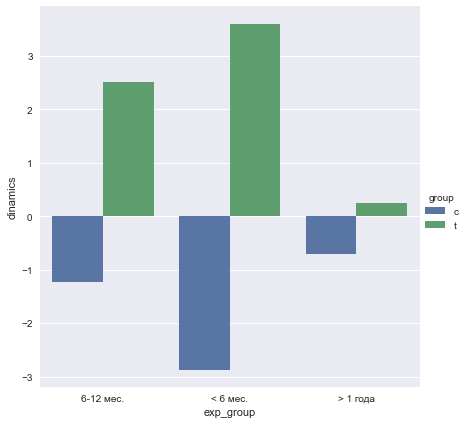

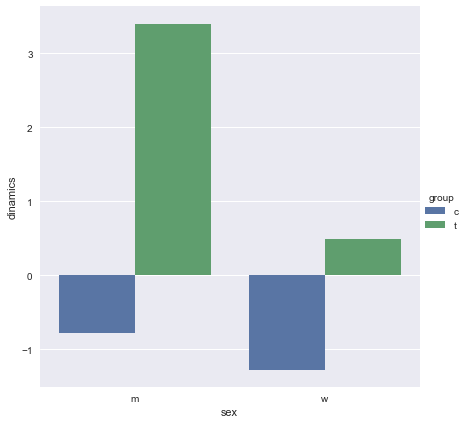

In [118]:
plot_segments_distribution(empl_nps_learn_2, ['exp_group', 'sex'], 'group')

In [120]:
gr_din_gr_exp_sex.sort_values(by = [('dinamics', 'describe', 'mean')], ascending = False)

dinamics                                         \
                        describe                                          
   group  exp_group sex    count       mean        std     min      25%   
8      t   < 6 мес.   m     49.0  10.193061  22.760784  -30.95   2.4200   
3      c   < 6 мес.   w     20.0   6.467500  22.306203  -28.58 -12.3875   
7      t  6-12 мес.   w     49.0   3.290612  25.759188  -65.15 -16.1300   
11     t   > 1 года   w     81.0   1.518519  24.416485  -66.67 -12.9900   
6      t  6-12 мес.   m     33.0   1.372121  15.242094  -25.19  -9.8000   
4      c   > 1 года   m    175.0   0.354971  25.423675 -171.05 -11.4700   
0      c  6-12 мес.   m     91.0  -0.348571  22.985132  -52.78 -13.8800   
5      c   > 1 года   w    189.0  -1.681958  23.837372 -127.27 -15.4400   
10     t   > 1 года   m     52.0  -1.706731  23.540921  -54.76 -16.7450   
1      c  6-12 мес.   w     82.0  -2.213537  35.150066 -180.00 -16.6000   
9      t   < 6 мес.   w     33.0  -6.181818  33.830188 -155.56 -15.4300   
2      c   < 6 мес.   m     25.0 -10.333600  45.916983 -184.62 -16.4000   

                             
                             
       50%      75%     max  
8    7.700  22.9200   64.29  
3   10.865  19.5950   50.80  
7    9.650  23.3300   54.17  
11   0.850  12.7000   75.71  
6    3.840  13.9400   29.17  
4   -0.110  13.2700   75.00  
0   -2.900  13.7800  100.00  
5    0.000  12.2000   80.00  
10   0.900  14.3075   68.75  
1   -2.225  11.8625  100.00  
9   -3.290   4.7900   44.83  
2   -4.170  18.0000   47.06

### Вычисление доли вхождения в целевой показатель от тех кто предварительно имел показатель ниже допустимого:

In [ ]:
# Предобрабатываю данные для будущего подсчета доли вхождения в целевой и допустимый
empl_nps_goal = empl_nps_learn_2[empl_nps_learn_2['tNps_ДО']<0.71]
empl_nps_goal['addmissible'] = np.where(empl_nps_goal['tNPS_after']>=0.7, 1, 0)
empl_nps_goal['goal'] = np.where(empl_nps_goal['tNPS_after']>=0.75, 1, 0)

In [127]:
empl_nps_goal.groupby(by = ['group']).agg({'goal':'mean'})*100

,goal
group,
c,39.062500
t,31.288344


In [128]:
# Функция для быстрой отрисовки распределений:
def plot_segments_distribution_goal(df, segment_columns, test_factor):
    for segment in segment_columns:
        aggregated_data = df.groupby(by = [test_factor, segment])['goal'].mean().reset_index()
        sns.catplot(x = segment, 
                    y = 'goal', 
                    hue = test_factor, # сообщаем, что хотим, чтобы разные группы имели разный цвет
                    data = aggregated_data, 
                    kind = "bar", 
                    height = 6, # задаем размер графика 
                    aspect = 1) # задаем ширину столбца

<AxesSubplot:xlabel='group'>

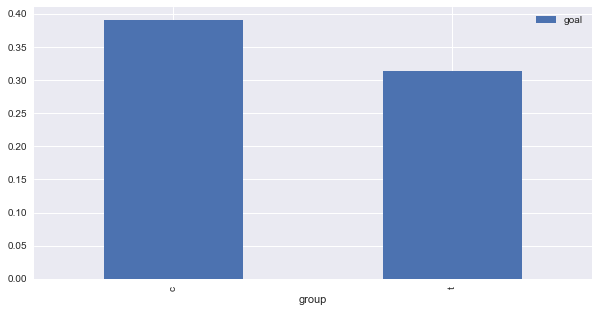

In [132]:
empl_nps_goal.groupby(['group']).agg('mean')[['goal']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           )

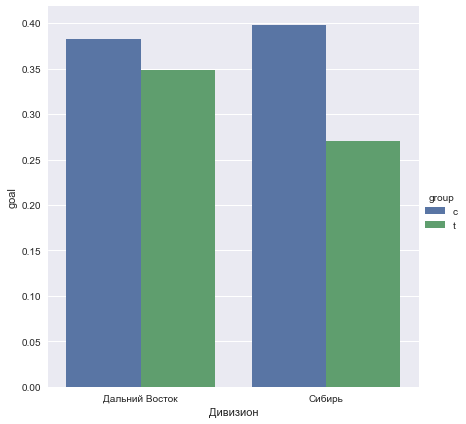

In [130]:
plot_segments_distribution_goal(empl_nps_goal, ['Дивизион'], 'group')

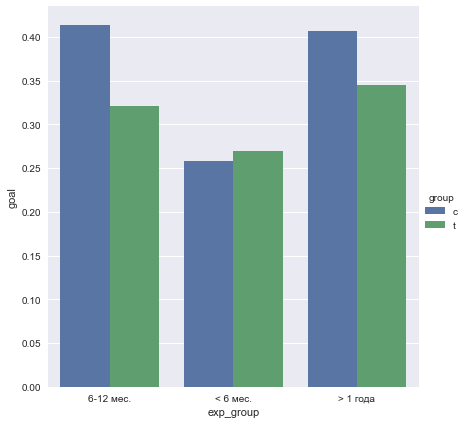

In [131]:
plot_segments_distribution_goal(empl_nps_goal, ['exp_group'], 'group')

### Вычисление доли вхождения в допустимый показатель от тех кто предварительно имел показатель ниже допустимого:

In [133]:
def plot_segments_distribution_adm(df, segment_columns, test_factor):
    for segment in segment_columns:
        aggregated_data = df.groupby(by = [test_factor, segment])['addmissible'].mean().reset_index()
        sns.catplot(x = segment, 
                    y = 'addmissible', 
                    hue = test_factor, # сообщаем, что хотим, чтобы разные группы имели разный цвет
                    data = aggregated_data, 
                    kind = "bar", 
                    height = 6, # задаем размер графика 
                    aspect = 1) # задаем ширину столбца

<AxesSubplot:xlabel='group'>

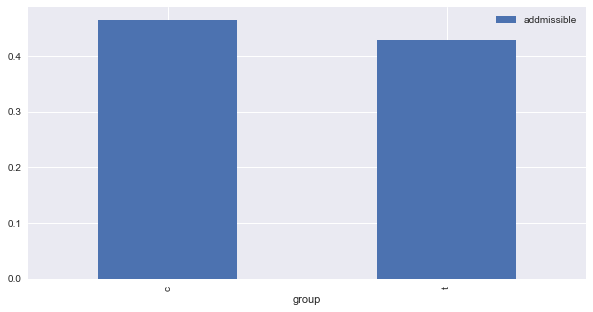

In [134]:
empl_nps_goal.groupby(['group']).agg('mean')[['addmissible']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           )

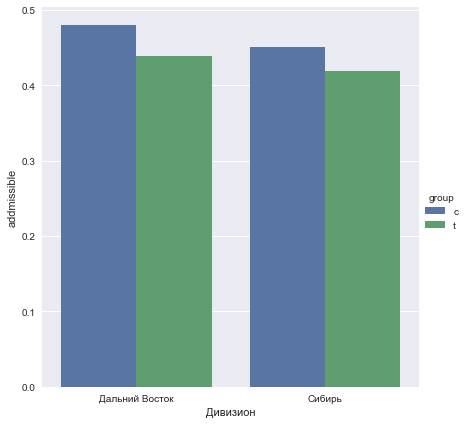

In [135]:
plot_segments_distribution_adm(empl_nps_goal, ['Дивизион'], 'group')

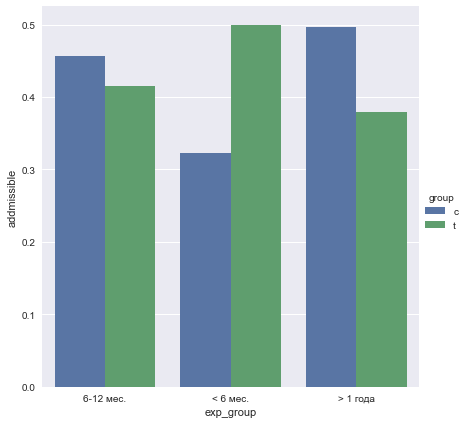

In [136]:
plot_segments_distribution_adm(empl_nps_goal, ['exp_group'], 'group')

# A/B Tests:

#### A/B test динамики tNps:

In [137]:
empl_nps_ab = empl_nps_learn_2

In [138]:
import scipy
from scipy.stats import ttest_ind

In [141]:
s, p = ttest_ind(empl_nps_ab[empl_nps_ab['group'] == 'c']['dinamics'],
                 empl_nps_ab[empl_nps_ab['group'] == 't']['dinamics'])

In [142]:
p

0.13356932776204627

#### A/B test by expirience:

In [145]:
for i in empl_nps_ab['exp_group'].unique():
    
    s, p = ttest_ind(
        empl_nps_ab[(empl_nps_ab['exp_group'] == i)
                    & (empl_nps_ab['group'] == 'c')]['dinamics'],
        empl_nps_ab[(empl_nps_ab['exp_group'] == i)
                    & (empl_nps_ab['group'] == 't')]['dinamics'])
    print (f'{i} p_value = {p}')

< 6 мес. p_value = 0.28155774785577475
6-12 мес. p_value = 0.3045888942787677
> 1 года p_value = 0.698506080177982


#### A/B test by sex:

In [146]:
for i in empl_nps_ab['sex'].unique():
    
    s, p = ttest_ind(
        empl_nps_ab[(empl_nps_ab['sex'] == i)
                    & (empl_nps_ab['group'] == 'c')]['dinamics'],
        empl_nps_ab[(empl_nps_ab['sex'] == i)
                    & (empl_nps_ab['group'] == 't')]['dinamics'])
    print (f'{i} p_value = {p}')

m p_value = 0.11817602856530705
w p_value = 0.5086160598197949


#### A/B test by Division:

In [147]:
for i in empl_nps_ab['Дивизион'].unique():
    
    s, p = ttest_ind(
        empl_nps_ab[(empl_nps_ab['Дивизион'] == i)
                    & (empl_nps_ab['group'] == 'c')]['dinamics'],
        empl_nps_ab[(empl_nps_ab['Дивизион'] == i)
                    & (empl_nps_ab['group'] == 't')]['dinamics'])
    print (f'{i} p_value = {p}')

Дальний Восток p_value = 0.47527650522848575
Сибирь p_value = 0.1664712791786321


<AxesSubplot:xlabel='group', ylabel='dinamics'>

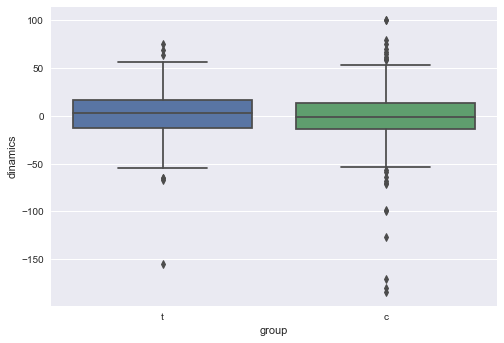

In [183]:
# Визуализация результатов A/B теста
sns.boxplot(x = 'group', y = 'dinamics', data = empl_nps_ab, fliersize=5)

<AxesSubplot:xlabel='Дивизион', ylabel='dinamics'>

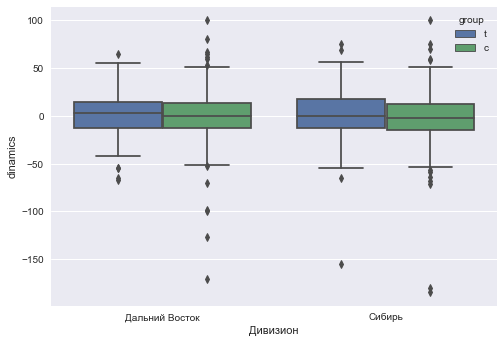

In [167]:
sns.boxplot(x = 'Дивизион', y = 'dinamics', hue = 'group', data = empl_nps_ab)

<AxesSubplot:xlabel='exp_group', ylabel='dinamics'>

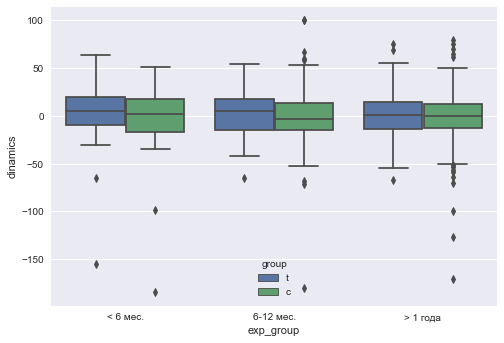

In [168]:
sns.boxplot(x = 'exp_group', y = 'dinamics', hue = 'group', data = empl_nps_ab)

<AxesSubplot:xlabel='sex', ylabel='dinamics'>

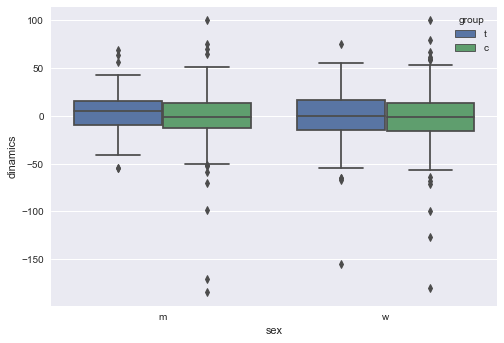

In [169]:
sns.boxplot(x = 'sex', y = 'dinamics', hue = 'group', data = empl_nps_ab)

### Тест Манна-Уитни

In [171]:
empl_nps_ab_t = empl_nps_ab[empl_nps_ab['group']=='t']
empl_nps_ab_c = empl_nps_ab[empl_nps_ab['group']=='c']

In [173]:
import scipy.stats as stats

stats.mannwhitneyu(x=empl_nps_ab_c['dinamics'],
                   y=empl_nps_ab_t['dinamics'],
                   alternative='two-sided')

MannwhitneyuResult(statistic=79859.0, pvalue=0.06509059570731446)

### A/B test доли вхождения в целевой:

In [178]:
s_g, p_g = ttest_ind(empl_nps_goal[empl_nps_goal['group'] == 'c']['goal'],
                 empl_nps_goal[empl_nps_goal['group'] == 't']['goal'])
print (f'p_value: {p_g}')

p_value: 0.10661301817942814


## Boostrap

In [189]:
# Импортируем библиотеку и модули:
#import bootstrapped
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare

In [190]:
# Смотрю документацию
??bs.bootstrap_ab

In [192]:
# Создаем 2 переменные контроль/тест и превращаем их в массив
test = empl_nps_ab[empl_nps_ab['group']== 't']['dinamics'].values
ctrl =  empl_nps_ab[empl_nps_ab['group']== 'c']['dinamics'].values

In [194]:
# Применяем функ-ю bs.bootstrap_ab() и сохраняем результаты в переменную:
Boot_results = bs.bootstrap_ab(
    test=test,
    ctrl=ctrl,
    stat_func=bs_stats.mean,  # что ищем (в нашем случае среднее(meen))
    compare_func=bs_compare.difference,  # что делаем со средним
    return_distribution=True  # Просим функцию вернуть результаты операции
)

In [195]:
Boot_results

array([2.66634212, 4.33063227, 2.49108733, ..., 2.48221198, 2.80549724,
       2.67520011])

In [196]:
# Выводим персентили:
borders  = np.percentile(Boot_results, [2.5, 97.5])
borders

array([-0.78665962,  6.35635738])

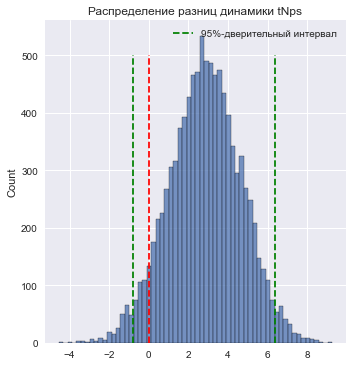

In [201]:
# Строим график с доверительными интервалами:
sns.displot(Boot_results)
plt.title ('Распределение разниц динамики tNps')
plt.rcParams["figure.figsize"] = (12, 6)
plt.vlines(0, ymin =0,  ymax = 500, linestyles= '--', colors = 'red')
plt.vlines(borders, ymin = 0,  ymax = 500, linestyles= '--', colors= 'green', label = '95%-дверительный интервал')
plt.legend()
plt.show()

### Boostrat for goals

In [231]:
test_g = empl_nps_goal[empl_nps_goal['group']== 't']['goal'].dropna().values
ctrl_g =  empl_nps_goal[empl_nps_goal['group']== 'c']['goal'].dropna().values

In [232]:
# Применяем функ-ю bs.bootstrap_ab() и сохраняем результаты в переменную:
Boot_results_g = bs.bootstrap_ab(
    test=test_g,
    ctrl=ctrl_g,
    stat_func=bs_stats.mean,  # что ищем (в нашем случае среднее(meen))
    compare_func=bs_compare.difference,  # что делаем со средним
    return_distribution=True  # Просим функцию вернуть результаты операции
)

In [233]:
Boot_results_g

array([-0.09111388, -0.13631135, -0.08442772, ..., -0.10451016,
       -0.09113785, -0.06825153])

In [234]:
# Выводим персентили:
borders_g  = np.percentile(Boot_results_g, [2.5, 97.5])
borders_g

array([-0.1703784 ,  0.01430754])

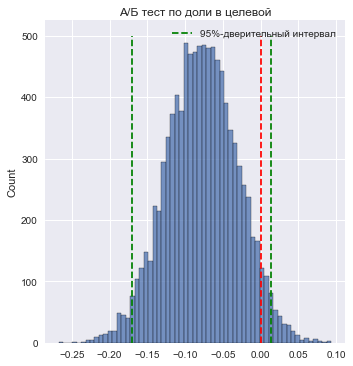

In [324]:
# Строим график с доверительными интервалами:
sns.displot(Boot_results_g)
plt.title ('А/Б тест по доли в целевой')
plt.rcParams["figure.figsize"] = (12, 6)
plt.vlines(0, ymin =0,  ymax = 500, linestyles= '--', colors = 'red')
plt.vlines(borders_g, ymin = 0,  ymax = 500, linestyles= '--', colors= 'green', label = '95%-дверительный интервал')
plt.legend()
plt.show()

In [236]:
empl_nps_goal_gr = empl_nps_goal.groupby(by = ['group']).agg({'barcode_mts':'count', 'goal':'sum'}).reset_index()

In [237]:
empl_nps_goal_gr

,group,barcode_mts,goal
0,c,256,100
1,t,163,51


In [238]:
empl_nps_goal_gr['conv'] = empl_nps_goal_gr['goal']/empl_nps_goal_gr['barcode_mts']*100
empl_nps_goal_gr

,group,barcode_mts,goal,conv
0,c,256,100,39.062500
1,t,163,51,31.288344


In [240]:
# Вычисляем Хи-квадрат:
import statsmodels.stats.proportion as proportion

chi2stat, pval, table = proportion.proportions_chisquare(
    empl_nps_goal_gr['goal'], empl_nps_goal_gr['barcode_mts'])

In [244]:
alpha = (0.05)

In [245]:
print(pval<alpha)

False


In [243]:
pval

0.10611294216650982

In [246]:
conversion_control = empl_nps_goal_gr['conv'].values[0]/100
conversion_test = empl_nps_goal_gr['conv'].values[1]/100
nobs = min(empl_nps_goal_gr['barcode_mts']) # минимальное кол-во наблюдений в одной из групп

In [247]:
# Вычисляем мощность:
chipower.solve_power(effect_size=chi2_effect_size(conversion_control,
                                                  conversion_test),
                     nobs=nobs,
                     alpha=pval,
                     power=None)

0.4895673078133217

## Вычисление MDE:

In [248]:
power = 0.8

In [249]:
size_if_each_test_group = chipower.solve_power(effect_size=chi2_effect_size(conversion_control,
                                                  conversion_test),
                     nobs=None,
                     alpha=pval,
                     power=power)
print ('Необходимый размер выборки для эксперимента - {:.0f}'.format(2*size_if_each_test_group))

Необходимый размер выборки для эксперимента - 781


## A/B test для доли сотрудников с положительной динамикой:

In [250]:
empl_nps_ab_gd = empl_nps_ab

In [254]:
empl_nps_ab_gd['g_d']= np.where(empl_nps_ab_gd['dinamics']>0, 1, 0)

C:\Users\nvlysen2\AppData\Local\Temp\ipykernel_7628\3502479524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empl_nps_ab_gd['g_d']= np.where(empl_nps_ab_gd['dinamics']>0, 1, 0)


In [257]:
def plot_segments_distribution_gd(df, segment_columns, test_factor):
    for segment in segment_columns:
        aggregated_data = df.groupby(by = [test_factor, segment])['g_d'].mean().reset_index()
        sns.catplot(x = segment, 
                    y = 'g_d', 
                    hue = test_factor, # сообщаем, что хотим, чтобы разные группы имели разный цвет
                    data = aggregated_data, 
                    kind = "bar", 
                    height = 6, # задаем размер графика 
                    aspect = 1) # задаем ширину столбца

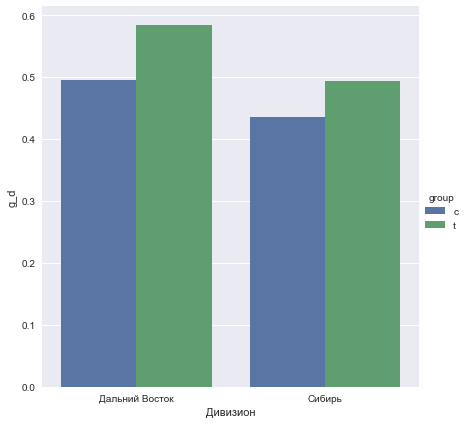

In [258]:
plot_segments_distribution_gd(empl_nps_ab_gd, ['Дивизион'], 'group')

### Bootstrap for +dinamics

In [259]:
empl_gr_gd = empl_nps_ab_gd.groupby(by = ['group']).agg({
    'barcode_mts':'count',
    'g_d':'sum'
}).reset_index()

empl_gr_gd['conversion'] = empl_gr_gd['g_d']/empl_gr_gd['barcode_mts']*100

In [260]:
empl_gr_gd

,group,barcode_mts,g_d,conversion
0,c,582,271,46.563574
1,t,297,160,53.872054


In [261]:
t_group = empl_nps_ab_gd[empl_nps_ab_gd['group']=='t']['g_d'].dropna().values
c_group = empl_nps_ab_gd[empl_nps_ab_gd['group']=='c']['g_d'].dropna().values

In [262]:
bt_results = bs.bootstrap_ab(test=t_group,
                             ctrl=c_group,
                             stat_func=bs_stats.mean,
                             compare_func=bs_compare.difference,
                             return_distribution=True)

In [263]:
bt_results

array([0.064702  , 0.06442431, 0.13582561, ..., 0.09163803, 0.05253567,
       0.06346975])

In [264]:
borders_gd = np.percentile(bt_results, [2.5, 97.5])

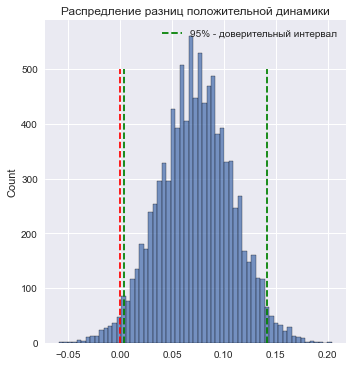

In [267]:
sns.displot(bt_results)
plt.title('Распредление разниц положительной динамики')
plt.rcParams["figure.figsize"] = (12, 6)
plt.vlines(0, ymin = 0, ymax = 500, linestyles= '--', colors = 'red')
plt.vlines(borders_gd, ymin = 0, ymax = 500, linestyles= '--', colors = 'green', label = '95% - доверительный интервал')
plt.legend()
plt.show()

In [268]:
# Вычисляем Хи-квадрат:
chi2stat, pval, table = proportion.proportions_chisquare(
    empl_gr_gd['g_d'], empl_gr_gd['barcode_mts'])

In [269]:
alpha = 0.5

In [270]:
print(pval<alpha)

True


In [271]:
pval

0.040350745477125104

In [277]:
conversion_control = empl_gr_gd['conversion'].values[0]/100
conversion_test = empl_gr_gd['conversion'].values[1]/100
nobs = min(empl_gr_gd['barcode_mts']) # минимальное кол-во наблюдений в одной из групп

In [278]:
# Вычисляем мощность:
chipower.solve_power(effect_size=chi2_effect_size(conversion_control,
                                                  conversion_test),
                     nobs=nobs,
                     alpha=pval,
                     power=None)

0.4190885516435202

In [279]:
power = 0.8

In [280]:
size_if_each_test_group = chipower.solve_power(effect_size=chi2_effect_size(conversion_control,
                                                  conversion_test),
                     nobs=None,
                     alpha=pval,
                     power=power)
print ('Необходимый размер выборки для эксперимента - {:.0f}'.format(2*size_if_each_test_group))

Необходимый размер выборки для эксперимента - 1458


## Выводы:
1. Есть разница между тестовой и контрольной группой по доли вхождения в целевой во пользу контрольной группы.

2. Есть разница в динамике контрольной и тестовой группы в пользу тестовой по средней динамики.

3. Разница в пунктах 1 и 2 статистический не значима и возможно случайна. или же ту разницу, которую мы увидели, меньше той, которую мы могли бы обнаружить при тестировании.

4. По пункту 2 необходимо продлить тест, так как мощность теста (вероятность обнаружения разницы) составила меньше 50% это и может являться причиной того, что разница статистически не значима.

5. Есть разница по доли сотрудников, которые показали положительную динамику и она статистически значима.